# K-Means Clustering Algorithm

It is an iterative algorithm that proceeds as follows :

**Input :**
- $n$ training examples represented with $m$ features
- Number of centroids : $k$

**Aligorithm :**
1. Randomly initialize $k$ centroids. Note that each centroid is a **vector** in $m$ dimensional space
2. Repeat until convergence :
    - Assign points to centroid randomly
    - Calculate the centroids based on the points assigned to the dataset

The algorithm converges when the centroid stops changing or in other words the cluster membership stabilizes and subsequent iterations do not yield any results

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

In [4]:
cluster_count = 3

**Synthetic Data Generation With 3 Clusters**

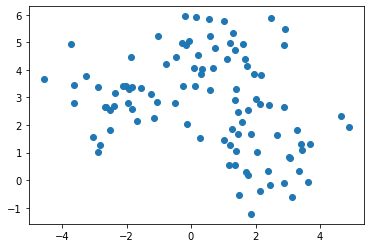

In [5]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=[[-2,3],[1,4],[2.5,1]], cluster_std=1, random_state=0)

plt.scatter(X[:,0], X[:,1])

In [6]:
def fit(X, k):
    # Choose k centroids
    centroids = X[np.random.randint(0,X.shape[0], size=k)] 
    labels = np.argmin(cdist(X, centroids), axis=1)
    for _iteration in range(10):
        previous_labels = labels.copy()
        centroids = np.array([np.mean(X[labels==r], axis=0) for r in range(k)])
        labels = np.argmin(cdist(X, centroids), axis=1)
        if all(labels == previous_labels):
            break
    return centroids, labels

In [7]:
centroids, labels = fit(X, cluster_count)

In [9]:
print("CENTROIDS : \n", centroids)
print("\nLABELS : \n", labels)

CENTROIDS : 
 [[ 2.33244263  1.13445789]
 [-2.2866262   2.87292917]
 [ 0.80635337  4.58788173]]

LABELS : 
 [1 0 1 0 0 2 1 0 2 1 0 2 2 0 0 1 0 2 0 2 2 1 2 2 2 1 2 1 2 0 2 0 2 0 0 0 0
 1 0 0 1 0 0 0 2 2 2 1 2 0 1 0 1 2 1 0 0 0 0 0 2 2 2 2 1 1 1 0 2 1 1 2 1 0
 1 1 1 2 1 2 2 0 0 1 0 0 1 0 1 0 1 2 2 0 1 2 0 2 2 2]


In [10]:
def plot_kmeans(X, centroids, labels, rseed=0, ax=None) :
    # Plot the input data
    ax = ax or plt.gca()
    ax.axis("equal")
    
    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="plasma", zorder=2)
    
    # Plot the representation of the KMean model
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centroids)]
    
    for c,r in zip(centroids, radii) :
        # Add circular shapes to the features
        ax.add_patch(plt.Circle(c, r, fc="#CCCCCC", lw=5, alpha=0.5, zorder=1))

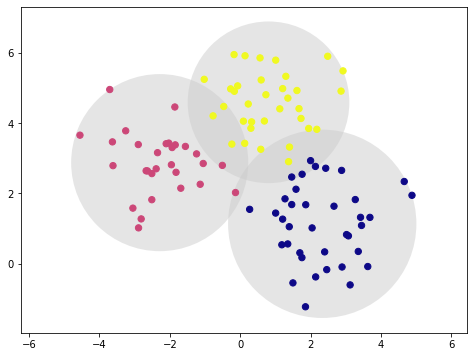

In [11]:
plt.figure(figsize=(8,6))
plot_kmeans(X, centroids, labels)

# Appendix

### `np.random.randint()`

In [20]:
c1 = X[np.random.randint(0, X.shape[0], size=1)] 
c2 = X[np.random.randint(0, X.shape[0], size=2)] 
c3 = X[np.random.randint(0, X.shape[0], size=3)] 
c4 = X[np.random.randint(0, X.shape[0], size=4)] 
c5 = X[np.random.randint(0, X.shape[0], size=5)] 


print(c1)
print("\n", c2)
print("\n", c3)
print("\n", c4)
print("\n", c5)

[[-2.63432209  2.63725883]]

 [[-2.67246045  2.64044684]
 [ 1.12691209  4.40198936]]

 [[0.26975462 1.54563433]
 [0.12920285 3.42115034]
 [0.23008393 4.53924919]]

 [[ 0.09270164  4.0519454 ]
 [-1.95424148  2.81281615]
 [ 1.75524518  0.17356146]
 [ 1.94725197  3.84498991]]

 [[ 0.56484645  5.84926373]
 [ 1.18409259  0.5384154 ]
 [-0.16514984  4.90082649]
 [-0.46722079  4.46935877]
 [-2.89546656  3.3869025 ]]


### `cdist(XA, XB, metric='euclidean', *, out=None, **kwargs)`
Compute distance between each pair of the two collections of inputs. See more [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html).

In [28]:
print(cdist(X, c1)[:5])
print("\n", cdist(X, c2)[:5])
print("\n", cdist(X, c3)[:5])

[[1.08253621]
 [5.92208837]
 [0.96627334]
 [4.33046517]
 [4.95123805]]

 [[1.10852524 3.14337325]
 [5.95312918 5.67249211]
 [0.99215179 3.25191565]
 [4.36713754 3.36058401]
 [4.98832971 3.5066818 ]]

 [[2.7983154  1.97472338 2.3778801 ]
 [3.19138743 4.95530257 5.98773798]
 [2.81793068 2.06609694 2.49211536]
 [1.22925881 2.68624181 3.6767135 ]
 [1.8516354  3.07341403 3.96167287]]
